In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

<font size="+3" color=purple ><b> <center><u>Academic and Employability Factors influencing placement</u></center></b></font>

Campus placement or campus recruiting is a program conducted within universities or other educational institutions to provide jobs to students nearing completion of their studies. In this type of program, the educational institutions partner with corporations who wish to recruit from the student population.

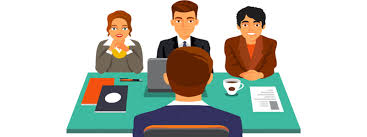

# About Dataset

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students
link - https://www.kaggle.com/benroshan/factors-affecting-campus-placement

# Objective 

In this kernel , my main motive to find out what factors  influenced a candidate in getting placed,does percentage matters for one to get placed,which degree specialization is much demanded by corporate , I will try find out this questions by story telling with data.So let's get started

<font size="+2" color=chocolate ><b>Please Upvote my kernel if you like my work.</b></font>

# Table of contents

- <a href='#1'>1. Exploring Data </a>
- <a href='#2'>2. How much dependency between MBA percentage and Salary </a>
- <a href='#3'>3. How much dependency between MBA percentage and Salary with specialisation   </a>
- <a href='#4'>4. Avg. % marks of mba by specialisation </a>
- <a href='#5'>5. Placement % of mba in each specialisation by gende </a>
- <a href='#6'>6. MBA percentage distribution </a>
- <a href='#7'>7. MBA percentage distribution by specialisation </a>
- <a href='#8'>8. Salary distribution  </a>
- <a href='#9'>9. Salary distribution of MBA in each specialisation </a>
- <a href='#10'>10. Relationship between college test percentage for interview and degree percentage</a>
- <a href='#11'>11. Degree percentage distribution </a>
- <a href='#12'>12. Etest percentage distribution </a>
- <a href='#13'>13. Ratio of students in each field of degree education </a>
- <a href='#14'>14. Percentage distribution in each field of degree education </a>
- <a href='#15'>15. How much dependency between Degree percentage and Salary? </a>
- <a href='#16'>16. How much dependency between Degree percentage and E test percentage?</a>
- <a href='#17'>17. Placement % of degree in each field by work experience </a>
- <a href='#18'>18. Salary distribution in each field of degree </a>
- <a href='#19'>19. Employability test percentage ( conducted by college) vs salary </a>
- <a href='#20'>20. How are ssc % ,hsc % and degree % related to each other for placed and non placed candidates?</a>
- <a href='#21'>21. How are the percentage scores spread in 3D for Commerce & Science graduates?</a>
- <a href='#22'>22. How are ssc%,hsc% and degree% related to each other for placed candidates?</a>
- <a href='#23'>23. Average % marks of hsc and ssc gender wise </a>
- <a href='#24'>24. Percentage distribution of different streams in hsc </a>
- <a href='#25'>25. Percentage distribution of different boards in hsc and ssc </a>

# <a id='1'> 1. Exploring Data</a>

In [ ]:
data=pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [ ]:
ProfileReport(data)

In [ ]:
data.head()

# <a id='2'> 2. How much dependency between MBA percentage and Salary</a>

In [ ]:
fig = px.scatter(data, x='mba_p', y='salary')
fig.update_layout(title='MBA percentage vs salary',xaxis_title="MBA % ",yaxis_title="Salary")
fig.show()

# <a id='3'> 3. How much dependency between MBA percentage and Salary with specialisation </a>

In [ ]:
fig = px.scatter(data, x='mba_p', y='salary',color='specialisation')
fig.update_layout(title='MBA percentage vs salary',xaxis_title="MBA % ",yaxis_title="Salary")
fig.show()

# <a id='4'> 4. Avg. % marks of mba by specialisation </a>

In [ ]:
df=data.groupby('specialisation')['mba_p'].mean()
df=pd.DataFrame(df).rename(columns={'mba_p': 'avg. mba %'}).reset_index()
df

In [ ]:
fig = go.Figure([go.Pie(labels=df['specialisation'], values=df['avg. mba %'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Avg. %  marks of mba by specialisation",title_x=0.5)
fig.show()


# <a id='5'> 5. Placement % of mba in each specialisation by gender </a>

In [ ]:
df=pd.DataFrame(data.groupby(['gender','specialisation','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

In [ ]:
fig = px.sunburst(df, path=['gender','status','specialisation'], values='no. of students')
fig.update_layout(title="Placement % of mba in each specialisation by gender ",title_x=0.5)
fig.show()

# <a id='6'> 6. MBA percentage distribution </a>

In [ ]:
mba_percentage=data['mba_p'].values
fig = go.Figure(go.Box(y=mba_percentage,name="MBA %"))
fig.update_layout(title="MBA percentage distribution")
fig.show()

# <a id='7'> 7. MBA percentage distribution by specialisation </a>

In [ ]:
mba_p_1=data[data['specialisation']=="Mkt&Fin"]['mba_p']
mba_p_2=data[data['specialisation']=="Mkt&HR"]['mba_p']    

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=mba_p_1,
                     marker_color="blue",
                     name="Mkt&Fn %"))
fig.add_trace(go.Box(y=mba_p_2,
                     marker_color="red",
                     name="Mkt&HR %"))
fig.update_layout(title="Distribution of percentage marks for specialisation -Mkt%Fn &  MKt&HR ")
fig.show()

# <a id='8'> 8. Salary distribution </a>

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['salary'],  # To get Horizontal plot ,change axis - y=campus_computer
                                  marker_color="chocolate",
                      xbins=dict(
                      start=200000, #start range of bin
                      end=1000000,  #end range of bin
                      size=10000    #size of bin
                      ))])
fig.update_layout(title="Distribution of Salary",xaxis_title="Salary",yaxis_title="Counts")
fig.show()

In [ ]:
mba_sal=data['salary'].values
fig = go.Figure(go.Box(y=mba_sal,name="salary"))
fig.update_layout(title="Salary distribution")
fig.show()

# <a id='9'> 9. Salary distribution of MBA in each specialisation </a>

In [ ]:
mba_sal_1=data[data['specialisation']=="Mkt&Fin"]['salary']
mba_sal_2=data[data['specialisation']=="Mkt&HR"]['salary']    

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=mba_sal_1,
                     marker_color="blue",
                     name="Salary of Mkt&Fn"))
fig.add_trace(go.Box(y=mba_sal_2,
                     marker_color="red",
                     name="Salary of Mkt&HR"))
fig.update_layout(title="Distribution of salary for specialisation : Mkt&Fn &  MKt&HR ")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=mba_sal_1,marker_color="green",name="Mkt&Fn"))
fig.add_trace(go.Histogram(x=mba_sal_2,marker_color="orange",name="MKt&HR"))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Distribution of salary for specialisation : Mkt&Fn &  MKt&HR",xaxis_title="salary",yaxis_title="Counts")
fig.show()

# <a id='10'> 10. Relationship between college test percentage for interview and degree percentage </a>

In [ ]:
fig = go.Figure(go.Histogram2d(
        x=data['etest_p'],
        y=data['degree_p']
    ))
fig.update_layout(title='Density of Interview Test & Degree Percentage',xaxis_title="Test Percentage",yaxis_title="Degree Percentage")
fig.show()

> # <a id='11'> 11. Degree percentage distribution </a>

In [ ]:
degree_percentage=data['degree_p'].values
fig = go.Figure(go.Box(y=degree_percentage,name="MBA %"))
fig.update_layout(title="Degree percentage distribution")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['degree_p'],marker_color="chocolate")])
fig.update_layout(title="Distribution of degree %",xaxis_title="degree %")
fig.show()

 # <a id='12'> 12. Etest percentage distribution </a>

In [ ]:
etest_percentage=data['etest_p'].values
fig = go.Figure(go.Box(y=etest_percentage,name="etest %"))
fig.update_layout(title="E-test percentage distribution")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=data['etest_p'],marker_color="blue")])
fig.update_layout(title="Distribution of etest %",xaxis_title="etest %")
fig.show()

 # <a id='13'> 13. Ratio of students in each field of degree education</a>

In [ ]:
fig = go.Figure([go.Pie(labels=data['degree_t'].unique(), values=data['degree_t'].value_counts())])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title=" Ratio of students in each field of degree education",title_x=0.5)
fig.show()


 # <a id='14'> 14. percentage distribution in each field of degree education</a>

In [ ]:
sci_tech=data[data['degree_t']=='Sci&Tech']['degree_p']
comm_mgmt=data[data['degree_t']=='Comm&Mgmt']['degree_p']
others=data[data['degree_t']=='Others']['degree_p']

fig = go.Figure()
fig.add_trace(go.Box(y=sci_tech,
                     marker_color="blue",
                     name="science & tech"))
fig.add_trace(go.Box(y=comm_mgmt,
                     marker_color="red",
                     name="commerce and management"))
fig.add_trace(go.Box(y=others,
                     marker_color="green",
                     name="others"))
fig.update_layout(title="percentage distribution in each field of degree education")
fig.show()

In [ ]:
hist_data = [sci_tech,comm_mgmt,others] # Added more distplot
group_labels = ['science and tech',"Commerce and management","others"]
colors=['blue',"green","orange"]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False, # Set False to hide histogram bars
                         colors=colors,bin_size=[10000,10000,10000])
fig.update_layout(title="percentage distribution in each field of degree education")
fig.show()

# <a id='15'> 15. How much dependency between Degree percentage and Salary? </a>

In [ ]:
fig = px.scatter(data, x='degree_p', y='salary')
fig.update_layout(title='Degree percentage vs salary',xaxis_title="Degree % ",yaxis_title="Salary")
fig.show()

# <a id='16'> 16. How much dependency between Degree percentage and E test percentage? </a>

In [ ]:
fig = px.scatter(data, x='mba_p', y='etest_p')
fig.update_layout(title='Degree % vs etest % ',xaxis_title="Degree % ",yaxis_title="Etest %")
fig.show()

# <a id='17'> 17. Placement % of degree in each field  by work experience </a>

In [ ]:
df=pd.DataFrame(data.groupby(['workex','degree_t','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

In [ ]:
fig = px.sunburst(df, path=['workex','status','degree_t'], values='no. of students')
fig.update_layout(title="Placement % of degree in each field  by work experience ",title_x=0.5)
fig.show()

> Not placed ratio is very of students having experience 

# <a id='18'> 18. Salary distribution in each field of degree  </a>

In [ ]:
data['salary'] = data['salary'].fillna(0)

In [ ]:
sci_tech=data[data['degree_t']=='Sci&Tech']['salary']
comm_mgmt=data[data['degree_t']=='Comm&Mgmt']['salary']
others=data[data['degree_t']=='Others']['salary']

In [ ]:
hist_data = [sci_tech,comm_mgmt,others] # Added more distplot
group_labels = ['science and tech',"Commerce and management","others"]
colors=['blue',"green","orange"]
fig = ff.create_distplot(hist_data, group_labels,show_hist=False, # Set False to hide histogram bars
                         colors=colors,bin_size=[10000,10000,10000])
fig.update_layout(title="salary distribution in each field of degree education")
fig.show()

In [ ]:
degree=round(data['degree_p'].mean(),2)
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    gauge = {
       'axis': {'range': [None, 100]}},
    value = degree,
    title = {'text': "Average degree %"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.show()


In [ ]:
degree=round(data['mba_p'].mean(),2)
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    gauge = {
       'axis': {'range': [None, 100]}},
    value = degree,
    title = {'text': "Average mba %"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.show()

# <a id='19'> 19. Employability test percentage ( conducted by college) vs salary </a>

In [ ]:
fig = px.scatter(data, x='etest_p', y='salary')
fig.update_layout(title=' Etest vs salary ',xaxis_title="Etest % ",yaxis_title="salary")
fig.show()

# <a id='20'> 20. How are ssc % ,hsc % and degree % related to each other for placed and non placed candidates?</a>

In [ ]:
fig = px.scatter_3d(data, x='ssc_p', y='hsc_p', z='degree_p',
              color='etest_p', size='etest_p', size_max=18,
              symbol='status', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# <a id='21'> 21. How are the percentage scores spread in 3D for Commerce & Science graduates? </a>

In [ ]:
com=data[data['degree_t']=='Comm&Mgmt']
sci=data[data['degree_t']=='Sci&Tech']

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])


fig.add_trace(
    go.Scatter3d(x=com['ssc_p'], y=com['hsc_p'], z=com['degree_p'],name="Commerce"),
    row=1, col=1)


fig.add_trace(
    go.Scatter3d(x=sci['ssc_p'], y=sci['hsc_p'], z=sci['degree_p'],name="Science"),
    row=1, col=2)

fig.update_layout(
    title_text='Percentage scores of Commerce & Science graduates',title_x=0.5)

fig.show()

# <a id='22'> 22. How are ssc%,hsc% and degree% related to each other for placed candidates? </a>

In [ ]:
placed=data[data['status']=='Placed']
fig = go.Figure(data=[go.Mesh3d(x=placed['ssc_p'], y=placed['hsc_p'], z=placed['degree_p'], color='lightblue', opacity=0.50)])
fig.show()

# <a id='23'> 23. Average % marks of hsc and ssc gender wise </a>

In [ ]:
df=pd.DataFrame(data.groupby('gender')['hsc_p','ssc_p'].mean()).reset_index()

In [ ]:
fig = go.Figure([go.Pie(labels=df['gender'], values=df['hsc_p'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Avg. %  marks in hsc by gender",title_x=0.5)
fig.show()


In [ ]:
fig = go.Figure([go.Pie(labels=df['gender'], values=df['ssc_p'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Avg. %  marks of ssc by gender",title_x=0.5)
fig.show()


# <a id='24'>24. Percentage distribution of different streams in hsc </a>

In [ ]:
comm=data[data['hsc_s']=='Commerce']['hsc_p']
sci=data[data['hsc_s']=='Science']['hsc_p']
arts=data[data['hsc_s']=='Arts']['hsc_p']

fig = go.Figure()
fig.add_trace(go.Box(y=comm,
                     marker_color="blue",
                     name="commerce"))
fig.add_trace(go.Box(y=sci,
                     marker_color="red",
                     name="science"))
fig.add_trace(go.Box(y=arts,
                     marker_color="green",
                     name="arts"))
fig.update_layout(title="percentage distribution of different streams in hsc")
fig.show()

# <a id='25'>25. Percentage distribution of different boards in hsc  and ssc</a>

In [ ]:
others=data[data['hsc_b']=='Others']['hsc_p']
central=data[data['hsc_b']=='Central']['hsc_p']

fig = go.Figure()
fig.add_trace(go.Box(y=others,
                     marker_color="blue",
                     name="others"))
fig.add_trace(go.Box(y=central,
                     marker_color="red",
                     name="central"))

fig.update_layout(title="percentage distribution of different boards in hsc")
fig.show()

In [ ]:
others=data[data['ssc_b']=='Others']['ssc_p']
central=data[data['ssc_b']=='Central']['ssc_p']

fig = go.Figure()
fig.add_trace(go.Box(y=others,
                     marker_color="blue",
                     name="others"))
fig.add_trace(go.Box(y=central,
                     marker_color="red",
                     name="central"))

fig.update_layout(title="percentage distribution of different boards in ssc")
fig.show()